In [2]:
from importlib import reload
#reload(Utilities)
#reload(clm)

import sys, os
import re
import pickle

import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype, is_timedelta64_dtype
from scipy import stats
import datetime
import time
from natsort import natsorted, ns, natsort_keygen
from packaging import version

import copy
import itertools
import adjustText

import pyodbc
#---------------------------------------------------------------------
sys.path.insert(0, os.path.realpath('..'))
import Utilities_config
#-----
import CommonLearningMethods as clm
#-----
from MeterPremise import MeterPremise
#-----
from AMI_SQL import AMI_SQL
from AMINonVee_SQL import AMINonVee_SQL
from AMIEndEvents_SQL import AMIEndEvents_SQL
from AMIUsgInst_SQL import AMIUsgInst_SQL
from DOVSOutages_SQL import DOVSOutages_SQL
#-----
from GenAn import GenAn
from AMINonVee import AMINonVee
from AMIEndEvents import AMIEndEvents
from AMIUsgInst import AMIUsgInst
from DOVSOutages import DOVSOutages
from AbsPerfectPower import AbsPerfectPower as appwr 
#-----
from DOVSAudit import DOVSAudit
from DABatch import DABatch
#---------------------------------------------------------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from matplotlib import dates
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_sql_aids_dir())
import Utilities_sql
import TableInfos
from TableInfos import TableInfo
from SQLElement import SQLElement
from SQLElementsCollection import SQLElementsCollection
from SQLSelect import SQLSelectElement, SQLSelect
from SQLFrom import SQLFrom
from SQLWhere import SQLWhereElement, SQLWhere
from SQLJoin import SQLJoin, SQLJoinCollection
from SQLGroupBy import SQLGroupByElement, SQLGroupBy
from SQLHaving import SQLHaving
from SQLOrderBy import SQLOrderByElement, SQLOrderBy
from SQLQuery import SQLQuery
from SQLQueryGeneric import SQLQueryGeneric
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_utilities_dir())
import Utilities
import Utilities_df
import Utilities_dt
from Utilities_df import DFConstructType
import Plot_General
import Plot_Box_sns
import Plot_Hist
import GrubbsTest
import DataFrameSubsetSlicer
from DataFrameSubsetSlicer import DataFrameSubsetSlicer as DFSlicer
from DataFrameSubsetSlicer import DataFrameSubsetSingleSlicer as DFSingleSlicer

In [4]:
# TODO: WHAT TO DO FOR ENTRIES WITH PN = NONE?

In [5]:
# opcos = ['ap', 'ky', 'oh', 'im', 'pso', 'swp', 'tx']
# opcos = ['oh']
opcos = ['ap', 'oh', 'im', 'pso', 'swp']

In [11]:
save_dir = r'C:\Users\s346557\Documents\LocalData\abs_perfect_power'
#-----
# date_0   = pd.to_datetime('2023-10-01')
# date_1   = pd.to_datetime('2024-09-30')
# daq_freq = 'W'

date_0   = pd.to_datetime('2024-11-11')
date_1   = pd.to_datetime('2024-11-17')
daq_freq = None
#-----
n_max = int((date_1-date_0+pd.Timedelta('1day'))/pd.Timedelta('15min'))

In [13]:
run_daq    = True
run_plots  = True
save_plots = True

In [16]:
#-------------------------
if run_daq:
    conn_aws  = Utilities.get_athena_prod_aws_connection()
    #-----
    appwr.run_daq_MB(
        save_dir = save_dir, 
        date_0   = date_0, 
        date_1   = date_1, 
        opcos    = opcos, 
        daq_freq = daq_freq, 
        conn_aws = conn_aws
    )




opco = ap
date_0 = 2024-11-11
date_1 = 2024-11-17


C:\Users\s346557\Documents\Analysis\AbsPerfectPower.py:223: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


94.4890661239624



opco = oh
date_0 = 2024-11-11
date_1 = 2024-11-17


C:\Users\s346557\Documents\Analysis\AbsPerfectPower.py:223: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


97.87381958961487



opco = im
date_0 = 2024-11-11
date_1 = 2024-11-17


C:\Users\s346557\Documents\Analysis\AbsPerfectPower.py:223: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


68.00631856918335



opco = pso
date_0 = 2024-11-11
date_1 = 2024-11-17


C:\Users\s346557\Documents\Analysis\AbsPerfectPower.py:223: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


70.59920072555542



opco = swp
date_0 = 2024-11-11
date_1 = 2024-11-17


C:\Users\s346557\Documents\Analysis\AbsPerfectPower.py:223: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


53.27022051811218


In [18]:
v1_subdir   = r'METHOD_1'
save_subdir = os.path.join(f"{date_0.strftime('%Y%m%d')}_{date_1.strftime('%Y%m%d')}", v1_subdir)

In [20]:
#-------------------------
if run_daq:
    conn_aws  = Utilities.get_athena_prod_aws_connection()
    for opco_i in opcos:
        #-----
        start = time.time()
        app_df = appwr.get_all_xNs(
            date_0   = '2023-10-01',
            date_1   = '2023-10-07',
            conn_aws = conn_aws, 
            opco     = opco_i
        )
        print(time.time()-start)
        app_df.to_pickle(os.path.join(save_dir, opco_i, save_subdir, f"app_SNs_{opco_i}.pkl"))

C:\Users\s346557\Documents\Analysis\GenAn.py:662: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


46.33284306526184
53.99390196800232
26.067839860916138
29.501654386520386
18.660138368606567


In [21]:
save_dir

'C:\\Users\\s346557\\Documents\\LocalData\\abs_perfect_power'

In [22]:
save_subdir

'20241111_20241117\\METHOD_1'

In [23]:
sql = appwr.get_nzeros_ntotal_sql_v2(
    date_0       = date_0, 
    date_1       = date_1, 
    measure      = 'n_total', 
    return_stmnt = True, 
    opcos        = ['oh']
)

In [28]:
print(sql)

SELECT
	aep_premise_nb,
	serialnumber,
	COUNT(DISTINCT starttimeperiod)
FROM usage_nonvee.reading_ivl_nonvee
WHERE aep_opco = 'oh'
AND   aep_usage_dt BETWEEN '2024-11-11' AND '2024-11-17'
AND   aep_derived_uom = 'VOLT'
GROUP BY
	aep_premise_nb,
	serialnumber


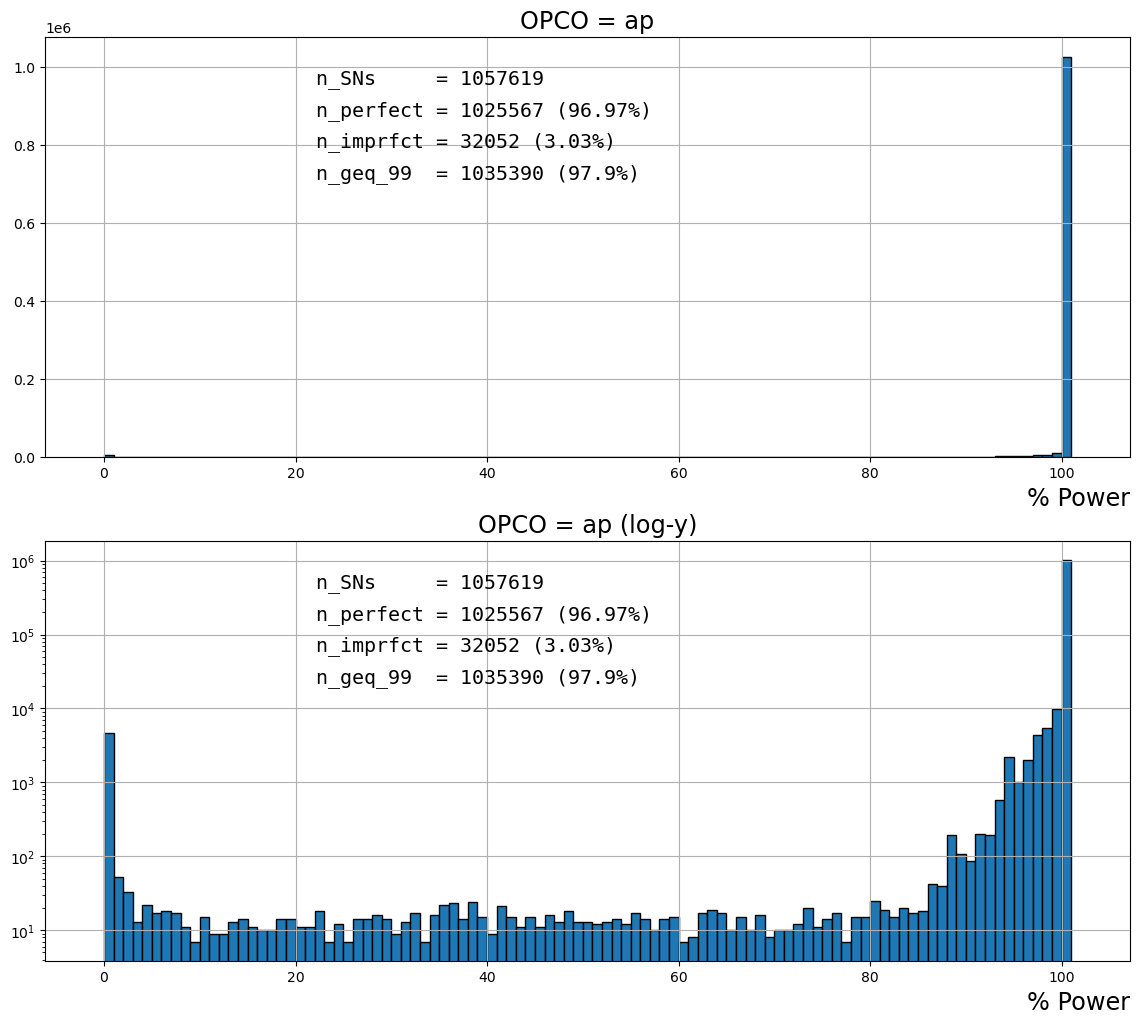

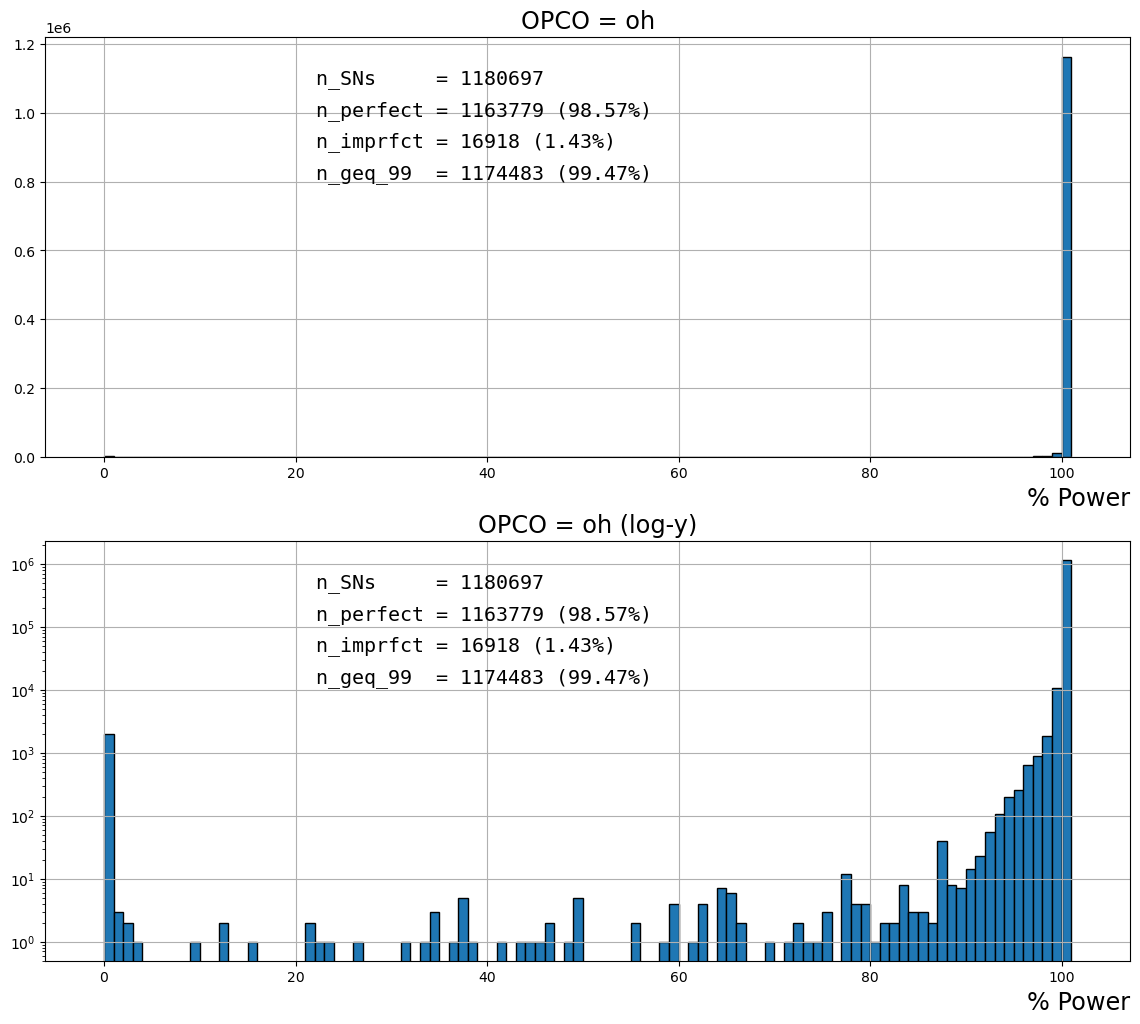

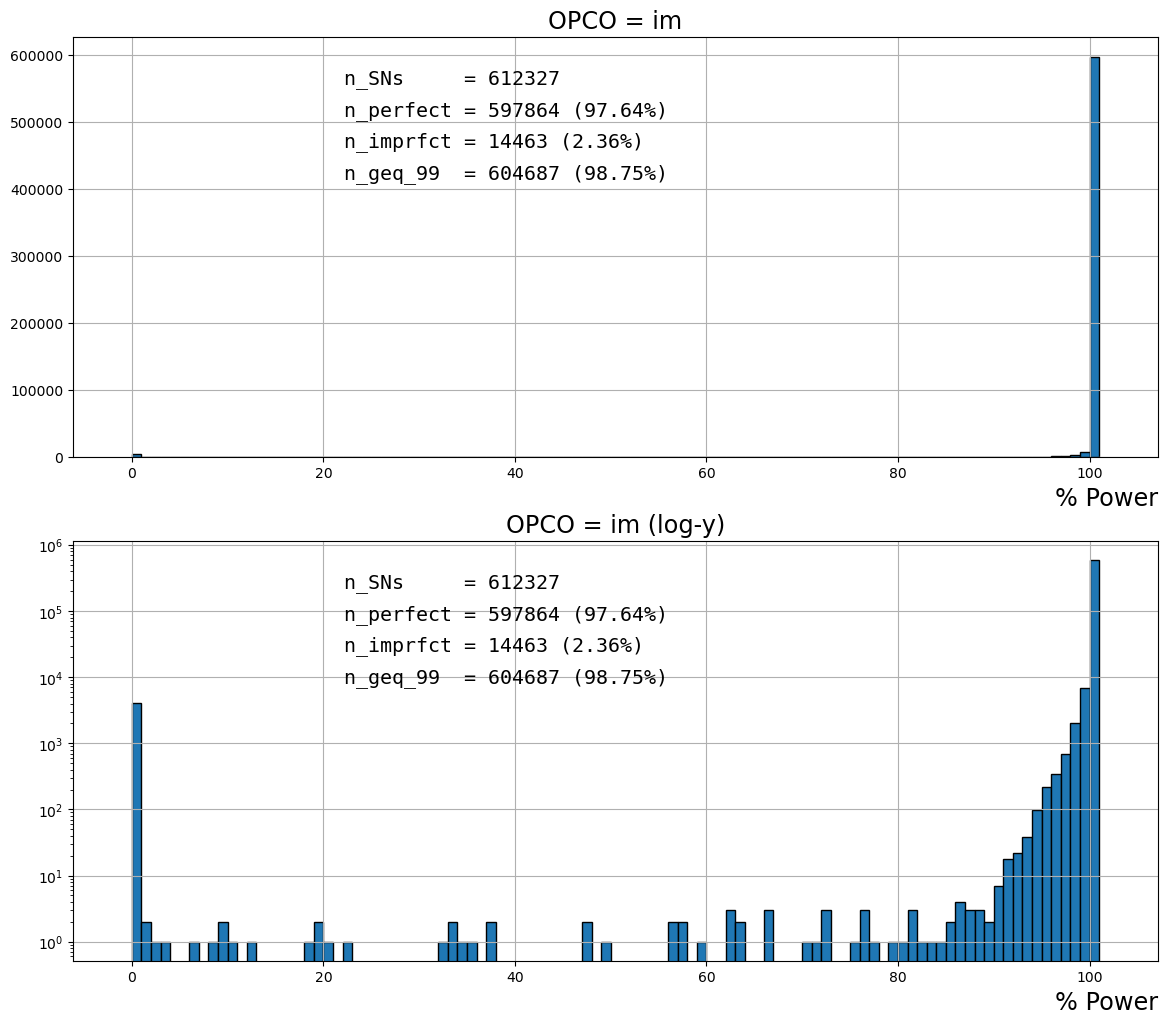

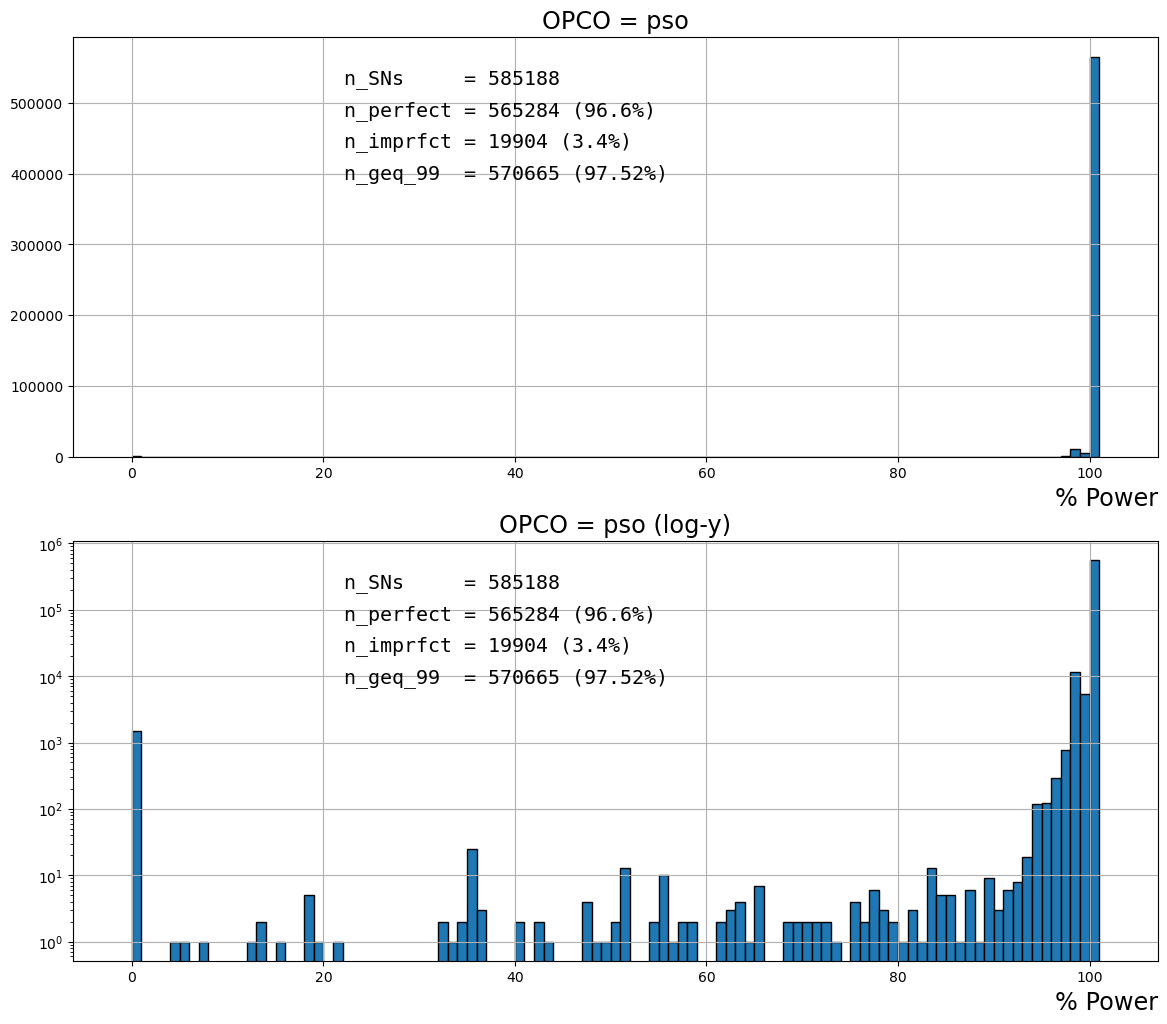

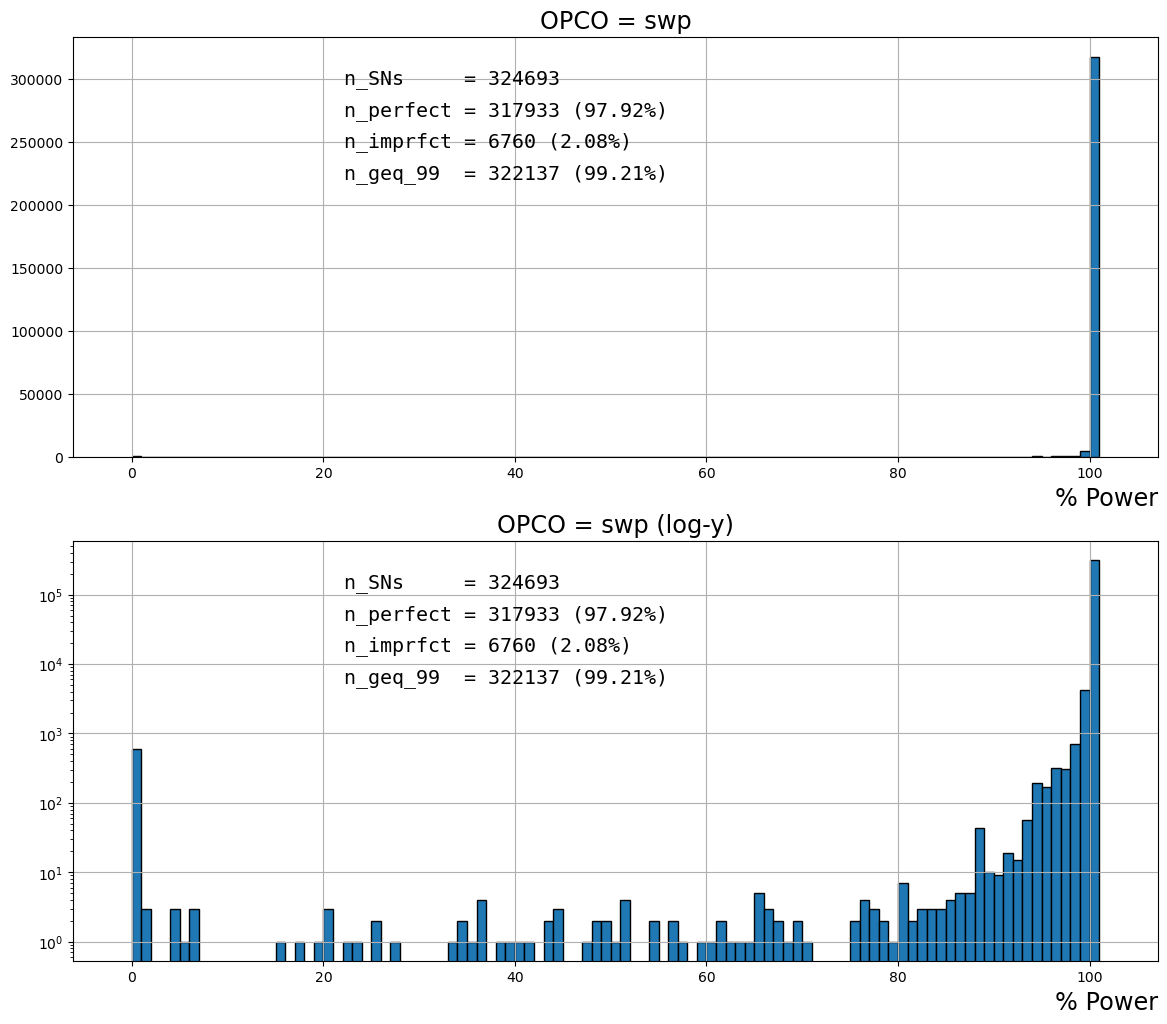

In [42]:
if run_plots:
    app_dfs = dict()
    for opco_i in opcos:
        app_df_i = pd.read_pickle(os.path.join(save_dir, opco_i, save_subdir, f"app_df_agg_{opco_i}.pkl"))
        assert(opco_i not in app_dfs)
        app_dfs[opco_i] = app_df_i
    #-------------------------
    if save_plots:
        pdf = PdfPages(os.path.join(save_dir, f"AbsolutePerfectPower_{date_0.strftime('%Y%m%d')}_{date_1.strftime('%Y%m%d')}.pdf"))
    #-------------------------
    fig_num = 0
    for i,(opco_i,app_df_i) in enumerate(app_dfs.items()):
        if opco_i=='ky':
            continue
        fig_i,axs_i = appwr.plot_hist_MB_ratios_df(
            ratios_df     = app_df_i, 
            figax         = None, 
            fig_num       = fig_num, 
            set_logy      = 'both', 
            title         = f"OPCO = {opco_i}", 
            include_text  = True
        )
        #-------------------------
        if save_plots:
            pdf.savefig(fig_i, bbox_inches='tight')
        #-------------------------
        fig_num+=1
    
    if save_plots:
        pdf.close()

In [44]:
app_dfs = dict()
for opco_i in opcos:
    app_df_i = pd.read_pickle(os.path.join(save_dir, save_subdir, f"app_df_{opco_i}.pkl"))
    assert(opco_i not in app_dfs)
    app_dfs[opco_i] = app_df_i

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\s346557\\Documents\\LocalData\\abs_perfect_power\\20241111_20241117\\METHOD_1\\app_df_ap.pkl'

In [ ]:
app_df_i = app_dfs['oh'].copy()

In [ ]:
# Found cases where a single serial number corresponds to two different premises.
# My guess is that the meter was moved and re-used elsewhere.
# In any case, this situation means I cannot simply call, e.g., 
#   n_perfect = app_df_i[app_df_i['pct_0']==0]['serialnumber'].nunique()
# but must instead use
#   n_perfect = app_df_i[app_df_i['pct_0']==0].groupby(['aep_premise_nb', 'serialnumber']).ngroups
#-----
n_SNs = app_df_i.groupby(['aep_premise_nb', 'serialnumber']).ngroups
n_perfect = app_df_i[app_df_i['pct_0']==0].groupby(['aep_premise_nb', 'serialnumber']).ngroups
n_imprfct = app_df_i[app_df_i['pct_0']!=0].groupby(['aep_premise_nb', 'serialnumber']).ngroups
assert(n_perfect+n_imprfct==n_SNs)

In [ ]:
app_df_i.head()

In [ ]:
app_df_i['pct_measured'] = 100*app_df_i['n_total']/n_max

In [ ]:
app_df_i['pct_measured'].describe()

In [ ]:
fig,ax = Plot_General.default_subplots()
sns.histplot(
    ax=ax, 
    data=app_df_i, 
    x='pct_~0', 
    y='pct_measured', 
    bins=(bins,bins), 
    stat='count', 
    cbar=True, 
    # cmap='inferno', 
    # cmap=sns.color_palette("magma", as_cmap=True), 
    cmap=sns.color_palette("coolwarm", as_cmap=True), 
);
ax.axhline(y=100, linewidth=0.5, color='black', linestyle='--', alpha=0.5)
ax.axvline(x=100, linewidth=0.5, color='black', linestyle='--', alpha=0.5)

In [ ]:
fig,ax = Plot_General.default_subplots()
sns.histplot(
    ax=ax, 
    data=app_df_i, 
    x='pct_~0', 
    y='pct_measured', 
    bins=(bins,bins), 
    stat='count', 
    cbar=True, 
    # cmap='inferno', 
    # cmap=sns.color_palette("magma", as_cmap=True), 
    cmap=sns.color_palette("coolwarm", as_cmap=True), 
    norm=mpl.colors.LogNorm(), 
    vmin=None, 
    vmax=None
);
ax.axhline(y=100, linewidth=0.5, color='black', linestyle='--', alpha=0.5)
ax.axvline(x=100, linewidth=0.5, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('% Power', fontsize='xx-large', loc='right')
ax.set_ylabel('% Max n_measurements', fontsize='x-large', loc='top')

# CI_NB vs Number of Premises

In [ ]:
conn_dovs  = Utilities.get_utldb01p_oracle_connection()

In [ ]:
outages_sql = DOVSOutages_SQL.build_sql_std_outage(
    mjr_mnr_cause   = None, 
    include_premise = True, 
    date_range      = ['2024-01-01', '2024-09-30'], 
    states          = None, 
    opcos           = ['OH'], 
    CI_NB_min       = None
)

In [ ]:
outages_sql.print()

In [ ]:
outages_sql_stmnt = outages_sql.get_sql_statement()
outages_df = pd.read_sql_query(
    outages_sql_stmnt, 
    conn_dovs, 
    dtype={
        'CI_NB'       : np.int32, 
        'CMI_NB'      : np.float64, 
        'OUTG_REC_NB' : np.int32
    }
)

In [ ]:
outages_df

In [ ]:
outages_df_slim = DOVSOutages.consolidate_df_outage(
    df_outage                = outages_df, 
    addtnl_grpby_cols        = None, 
    set_outg_rec_nb_as_index = False, 
    gpby_dropna              = False
)

In [ ]:
outages_df_slim['nPNs'] = outages_df_slim['PREMISE_NBS'].apply(lambda x: len(set(x)))

In [ ]:
outages_df_slim['delta'] = outages_df_slim['CI_NB'] - outages_df_slim['nPNs']

In [ ]:
outages_df_slim

In [ ]:
outages_df_slim['delta'].describe()

In [ ]:
fig,ax = Plot_General.default_subplots()
Plot_Hist.plot_hist(
    ax=ax, 
    df=outages_df_slim, 
    x_col='delta', 
    min_max_and_bin_size=[-10.5, 10.5, 1], 
    include_over_underflow=True, 
    stat='count', 
    plot_sns=False, 
    hist_plot_kwargs=None, 
    keep_edges_opaque=True, 
    div_drawn_width_by=None, 
    relative_position_idx=None, 
    run_set_general_plotting_args=True, 
    orient='v'
)
ax.set_xlabel('CI_NB - nPNs')

In [ ]:
fig,ax = Plot_General.default_subplots()
Plot_Hist.plot_hist(
    ax=ax, 
    df=outages_df_slim, 
    x_col='delta', 
    min_max_and_bin_size=[-10, 10, 1], 
    include_over_underflow=True, 
    stat='count', 
    plot_sns=False, 
    hist_plot_kwargs=None, 
    keep_edges_opaque=True, 
    div_drawn_width_by=None, 
    relative_position_idx=None, 
    run_set_general_plotting_args=True, 
    orient='v'
)
ax.set_yscale('log')

In [ ]:
fig,ax = Plot_General.default_subplots()
Plot_Hist.plot_hist(
    ax=ax, 
    df=outages_df_slim, 
    x_col='delta', 
    min_max_and_bin_size=[-1000, 1000, 100], 
    include_over_underflow=True, 
    stat='count', 
    plot_sns=False, 
    hist_plot_kwargs=None, 
    keep_edges_opaque=True, 
    div_drawn_width_by=None, 
    relative_position_idx=None, 
    run_set_general_plotting_args=True, 
    orient='v'
)
ax.set_yscale('log')

In [ ]:
fig,ax = Plot_General.default_subplots()
Plot_Hist.plot_hist(
    ax=ax, 
    df=outages_df_slim, 
    x_col='delta', 
    min_max_and_bin_size=[-3550, 2050, 100], 
    include_over_underflow=True, 
    stat='count', 
    plot_sns=False, 
    hist_plot_kwargs=None, 
    keep_edges_opaque=True, 
    div_drawn_width_by=None, 
    relative_position_idx=None, 
    run_set_general_plotting_args=True, 
    orient='v'
)
ax.set_yscale('log')
ax.set_xlabel('CI_NB - nPNs')
ax.text(0.15, 0.900, f"Net(CI_NB - nPNs) = {np.round(outages_df_slim['delta'].sum(), decimals=2)}", ha='left', va='center', transform=ax.transAxes, fontsize='x-large', fontdict={'family':'monospace'})

In [ ]:
fig,ax = Plot_General.default_subplots()
Plot_Hist.plot_hist(
    ax=ax, 
    df=outages_df_slim, 
    x_col='delta', 
    min_max_and_bin_size=[-3550, 2050, 100], 
    include_over_underflow=True, 
    stat='count', 
    plot_sns=False, 
    hist_plot_kwargs=None, 
    keep_edges_opaque=True, 
    div_drawn_width_by=None, 
    relative_position_idx=None, 
    run_set_general_plotting_args=True, 
    orient='v'
)

In [ ]:
outages_df_slim['delta'].sum()

In [ ]:
fig,axs = Plot_General.default_subplots(
    n_x = 1, 
    n_y = 2, 
    return_flattened_axes=True
)

Plot_Hist.plot_hist(
    ax=axs[0], 
    df=outages_df_slim, 
    x_col='delta', 
    min_max_and_bin_size=[-10.5, 10.5, 1], 
    include_over_underflow=True, 
    stat='count', 
    plot_sns=False, 
    hist_plot_kwargs=None, 
    keep_edges_opaque=True, 
    div_drawn_width_by=None, 
    relative_position_idx=None, 
    run_set_general_plotting_args=True, 
    orient='v'
)
axs[0].set_xlabel('CI_NB - nPNs', fontsize='xx-large', loc='right')
axs[0].text(0.15, 0.900, f"Net(CI_NB - nPNs) = {np.round(outages_df_slim['delta'].sum(), decimals=2)}", ha='left', va='center', transform=axs[0].transAxes, fontsize='x-large', fontdict={'family':'monospace'})

Plot_Hist.plot_hist(
    ax=axs[1], 
    df=outages_df_slim, 
    x_col='delta', 
    min_max_and_bin_size=[-3550, 2050, 100], 
    include_over_underflow=True, 
    stat='count', 
    plot_sns=False, 
    hist_plot_kwargs=None, 
    keep_edges_opaque=True, 
    div_drawn_width_by=None, 
    relative_position_idx=None, 
    run_set_general_plotting_args=True, 
    orient='v'
)
axs[1].set_yscale('log')
axs[1].set_xlabel('CI_NB - nPNs', fontsize='xx-large', loc='right')
axs[1].text(0.15, 0.900, f"Net(CI_NB - nPNs) = {np.round(outages_df_slim['delta'].sum(), decimals=2)}", ha='left', va='center', transform=axs[1].transAxes, fontsize='x-large', fontdict={'family':'monospace'})

Plot_General.save_fig(
    fig         = fig,
    save_dir    = r'C:\Users\s346557\Documents\LocalData\abs_perfect_power',
    save_name   = f"CI_vs_nPNs.pdf",
    bbox_inches = 'tight'
)